# Random Imitation Model

This notebook will consider the numerical analysis of the random imitation model.

In [1]:
from scipy.integrate import odeint
from utils import *

In [2]:
%%time
df = pd.read_feather('data/names.feather').set_index(['year', 'name', 'gender'])

CPU times: user 859 ms, sys: 418 ms, total: 1.28 s
Wall time: 2.39 s


## Random imitation model

We follow the model proposed in Hahn and Bentley (2003) whereby at each time-step the name of each baby is picked to match the name of a baby born the previous year uniformly at random, and with some probability there is a random mutation. For our purposes, we ignore the mutation component since it is less relevant among popular names. That is,
$$N_{i,t+1} \sim \text{Binom}\left(N, \frac{N_{i,t}}{N}\right)$$
where $N_{i,t}$ is the number of babies born to name $i$ in year $t$ and $N_t$ is the total number of babies born in year $t$.

[]

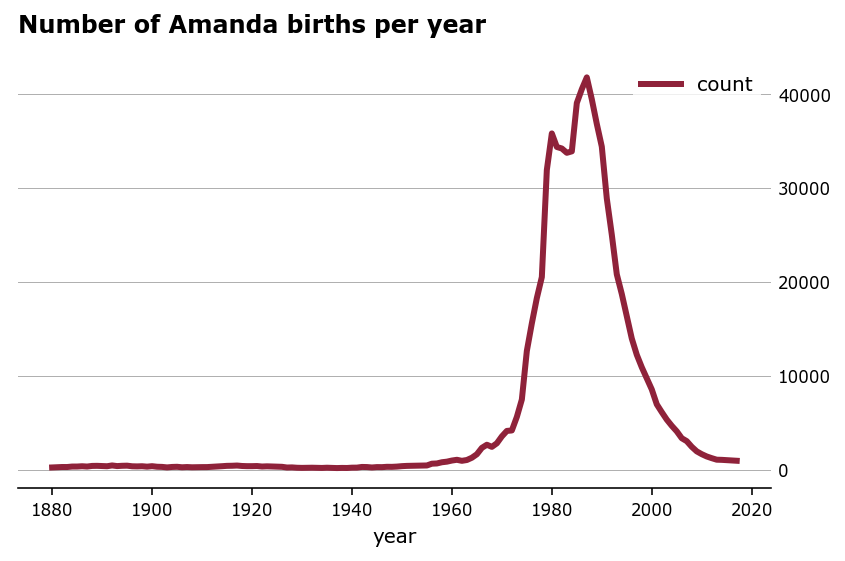

In [3]:
df.query('name == "Amanda" and gender == "F"').groupby('year').sum().plot()
ft_ax(title='Number of Amanda births per year')

[]

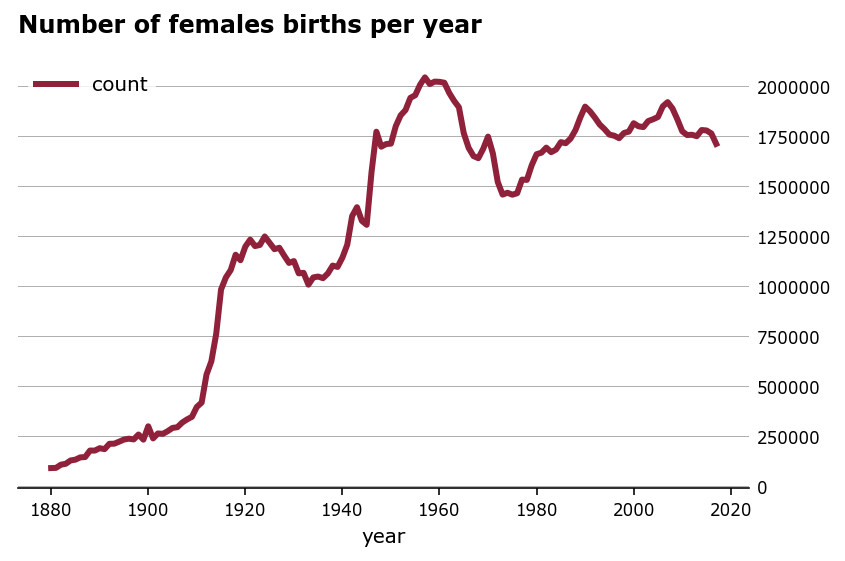

In [4]:
df.query('gender == "F"').groupby('year').sum().plot()
ft_ax(title='Number of females births per year')

In [5]:
# approximately true since 1940
N = int(1.75e6)

def draw_series(start_val, num_years, num_draws, start_year=0):
    vals = [np.array([start_val]*num_draws)]
    for i in range(num_years-1):
        vals.append(np.random.binomial(N, vals[-1]/N))
    return pd.DataFrame(vals, index=range(start_year, start_year+num_years))

In [6]:
# starting value
get_name_series('Amanda', df).loc[1975]

12700

## Projection

In [ ]:
df.di

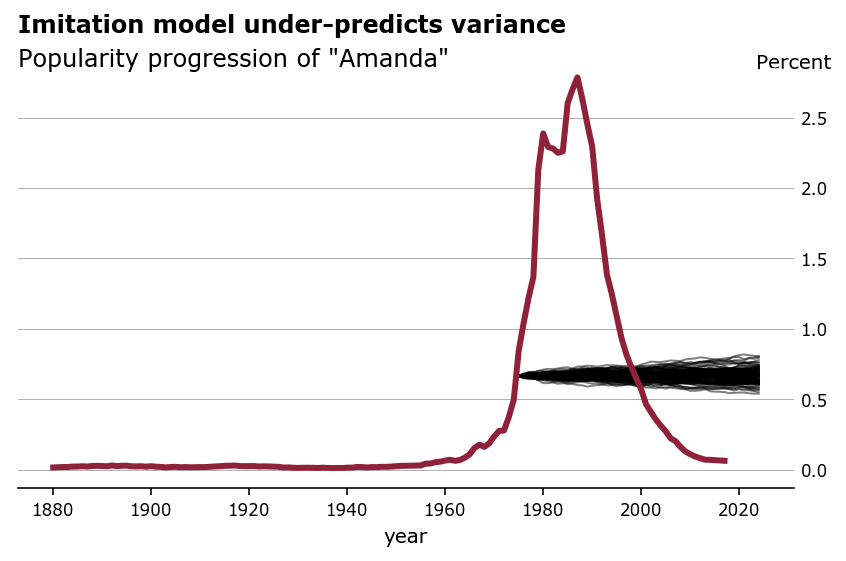

In [21]:
draw_series(int(1e4), num_years=50, num_draws=100, start_year=1975) \
    .divide(1.5e4) \
    .plot(c='k', alpha=.5, lw=1)
df.query('name == "Amanda" and gender == "F"').groupby('year').sum().divide(1.5e4).plot(ax=plt.gca())
plt.legend([])
plt.ylabel('Percent')
ft_ax(title='Imitation model under-predicts variance', 
      subtitle='Popularity progression of "Amanda"', yy=1.01)
plt.savefig('report/figs/imitation-model.pdf')
plt.savefig('slides/img/imitation-model.png', dpi=400)